#### Linear regression model to predict stock prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv("stock_data.csv") #loading the csv file
df=df[df.ticker=='AMZN']#choosing stock symbol
print(df.columns)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'ticker'],
      dtype='object')


### EDA

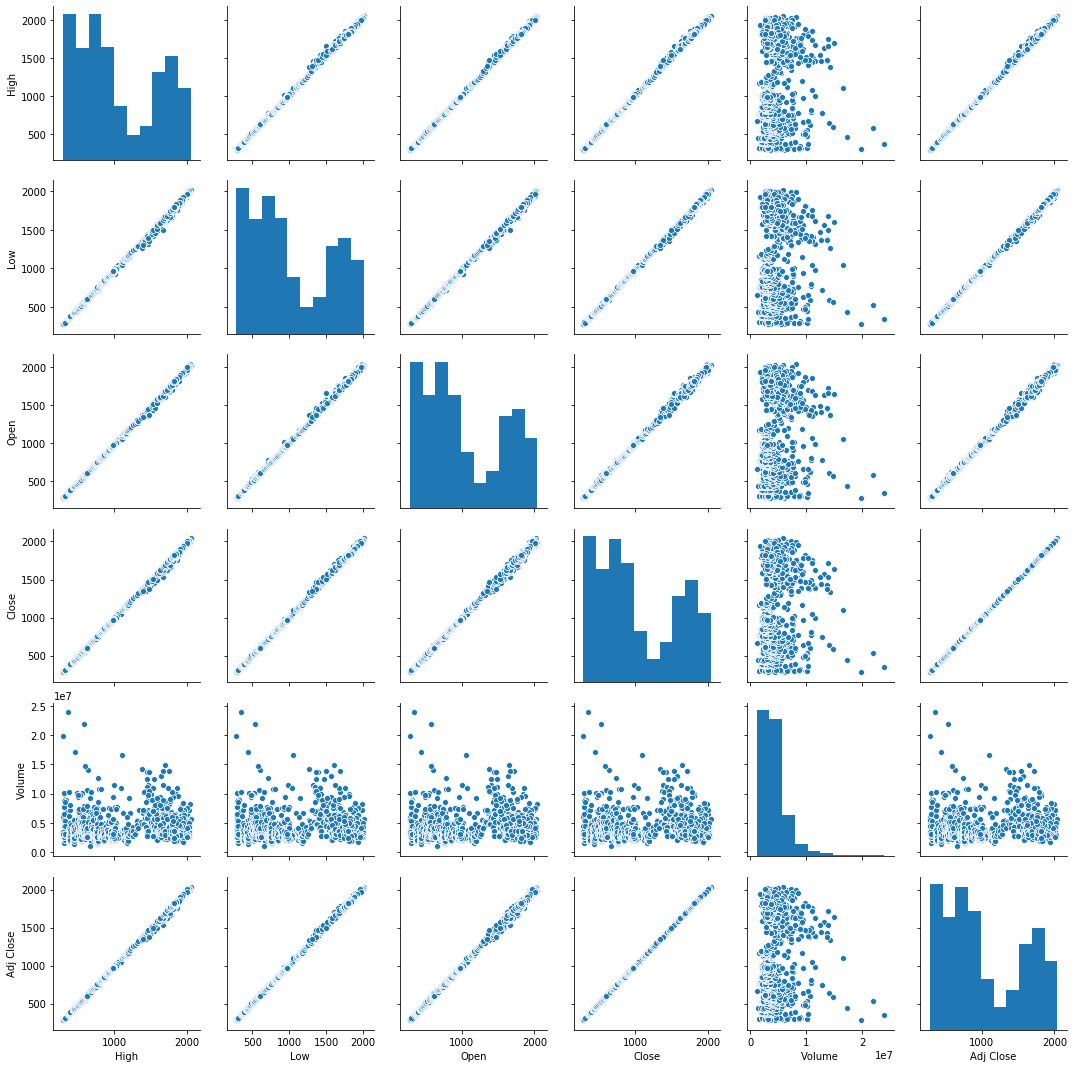

In [8]:
sns.pairplot(df)

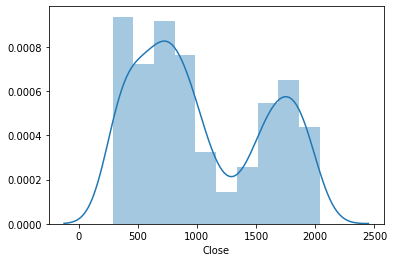

In [13]:
sns.distplot(df['Close'])

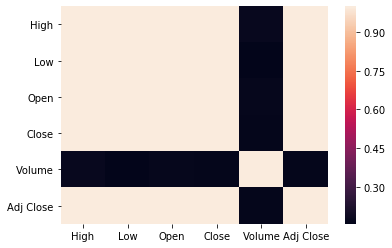

In [14]:
sns.heatmap(df.corr())

In [17]:
X = df[[ 'High', 'Low', 'Open', 'Adj Close']]
y = df['Close']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

score=lm.score(X_test,y_test);#testing the linear regression model
print(score)

1.0


In [24]:
print(lm.intercept_)

0.0


In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
High,-9.210941e-16
Low,1.863655e-15
Open,9.110579e-16
Adj Close,1.000000e+00


In [38]:
#print(X_test)
predictions = lm.predict(X_test)
#print(predictions)


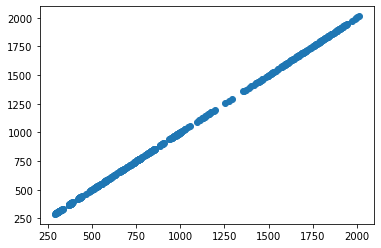

In [27]:
plt.scatter(y_test,predictions)

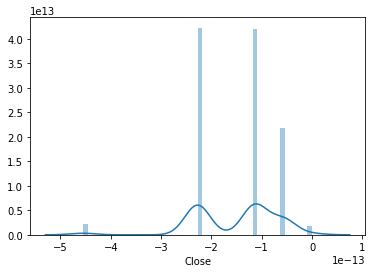

In [28]:
sns.distplot((y_test-predictions),bins=50);

MAE: 1.510571645766423e-13
MSE: 2.9534852317023325e-26
RMSE: 1.7185706944150806e-13


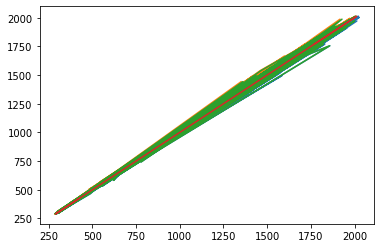

In [46]:
#print(predictions)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

response={};#creting json object
response['test_score']=score; 
response['forecast_set']=predictions;

plt.plot(X_test,y_test)

